In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


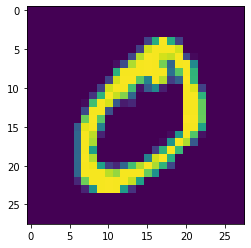

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
def convolution_block(no_of_kernels: int):
    model.add(Convolution2D(no_of_kernels, 3, 3, activation='relu', use_bias=False))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))


def transition_block(no_of_kernels: int):
    model.add(Convolution2D(no_of_kernels, 1, activation='relu', use_bias=False))
    model.add(MaxPooling2D())

In [0]:
from keras.layers import AveragePooling2D, GlobalAveragePooling2D

In [32]:
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28, 28, 1), use_bias=False)) # 26x26x10
convolution_block(16) # 24x24x16
convolution_block(16) # 22x22x16

transition_block(10) # 11x11x10

convolution_block(16) # 9x9x16
convolution_block(16) # 7x7x32
convolution_block(32) # 7x7x32

model.add(Convolution2D(10, 1, activation='relu', use_bias=False))
model.add(GlobalAveragePooling2D())
# transition_block(10) # 3x3x10

# model.add(Convolution2D(10, 3, 3)) # 1x1x10
# model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 26, 26, 10)        90        
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 24, 24, 16)        1440      
_________________________________________________________________
batch_normalization_41 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_41 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 22, 22, 16)        2304      
_________________________________________________________________
batch_normalization_42 (Batc (None, 22, 22, 16)        64        
_________________________________________________________________
dropout_42 (Dropout)         (None, 22, 22, 16)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`
  


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau

In [0]:
reduce_lr = ReduceLROnPlateau(verbose=1, patience=2, factor=0.5, min_lr=1e-6)
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(optimizer=Adam(lr=1e-2), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, callbacks=[reduce_lr], validation_data=(X_test, Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.1724 - acc: 0.9485 - val_loss: 0.0958 - val_acc: 0.9715
Epoch 2/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0605 - acc: 0.9810 - val_loss: 0.1301 - val_acc: 0.9633
Epoch 3/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0496 - acc: 0.9847 - val_loss: 0.1622 - val_acc: 0.9488

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 4/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0333 - acc: 0.9897 - val_loss: 0.0326 - val_acc: 0.9901
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0319 - acc: 0.9898 - val_loss: 0.0225 - val_acc: 0.9937
Epoch 6/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0297 - acc: 0.9904 - val_loss: 0.0243 - val_acc: 0.9925
Epoch 7/20
60000/60000 [=======================

In [36]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 79us/step


[0.014746979057077989, 0.9957]